Importação das bibliotecas

In [1]:
from sklearn.neighbors import NearestNeighbors
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score
from sklearn.model_selection import GridSearchCV

Leitura do dataset

In [2]:
# Ler a planilha CSV
nome_arquivo = 'winequality-white.csv'  # Substitua pelo nome do seu arquivo CSV
original = pd.read_csv(nome_arquivo, sep=';')
# Nome dos arquivos de treino e teste
nome_treino = 'treino.csv'
nome_teste = 'teste.csv'
# Ler as planilhas de treino e teste
treino = pd.read_csv(nome_treino, sep=';')
teste = pd.read_csv(nome_teste, sep=';')

In [3]:
# TREINAMENTO
X_train = treino.drop(columns=['quality'])
y_train = treino['quality']

# TESTE
X_test = teste.drop(columns=['quality'])
y_test = teste['quality']

In [4]:
# Utilizando o Pipeline para encadear a escala antes de usar o classificador
clf = Pipeline(
    steps=[("scaler", StandardScaler()), ("knn", KNeighborsClassifier(n_neighbors=1))]
)

KNN com validação cruzada usando todos os preditores

Melhor valor de k encontrado: 1
              precision    recall  f1-score   support

           3       0.33      0.14      0.20         7
           4       0.29      0.31      0.30        32
           5       0.63      0.65      0.64       358
           6       0.66      0.66      0.66       544
           7       0.64      0.66      0.65       241
           8       0.53      0.44      0.48        43
           9       0.00      0.00      0.00         0

    accuracy                           0.64      1225
   macro avg       0.44      0.41      0.42      1225
weighted avg       0.63      0.64      0.63      1225

[[  1   0   3   3   0   0   0]
 [  1  10  11   8   1   0   1]
 [  0  14 231  99  14   0   0]
 [  1   9 106 358  63   7   0]
 [  0   1  11  60 159  10   0]
 [  0   0   2  12  10  19   0]
 [  0   0   0   0   0   0   0]]


c:\ProgramData\Miniconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Miniconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Miniconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


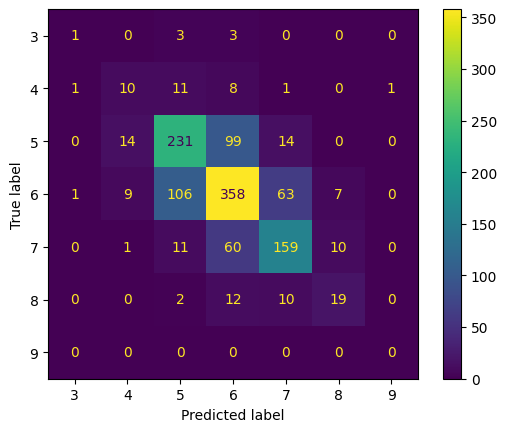

In [5]:
# Definindo uma grade de valores de k que você deseja testar
param_grid = {'knn__n_neighbors': list(range(1,50,2))}

# Criando um objeto GridSearchCV
grid_search = GridSearchCV(clf, param_grid, scoring = 'accuracy', cv=5)

# Fazendo a busca em grade no conjunto de treinamento
grid_search.fit(X_train, y_train)

# Obtendo o melhor valor de k encontrado
best_k = grid_search.best_params_['knn__n_neighbors']
print(f"Melhor valor de k encontrado: {best_k}")

# Treinando o classificador com o melhor valor de k
clf.set_params(knn__n_neighbors=best_k)
clf.fit(X_train, y_train)

# Avalie o classificador com o melhor valor de k
y_pred = clf.predict(X_test)

# Exibindo o relatório de classificação
print(classification_report(y_test, y_pred))

# Exibindo a matriz de confusão
cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
print(cm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


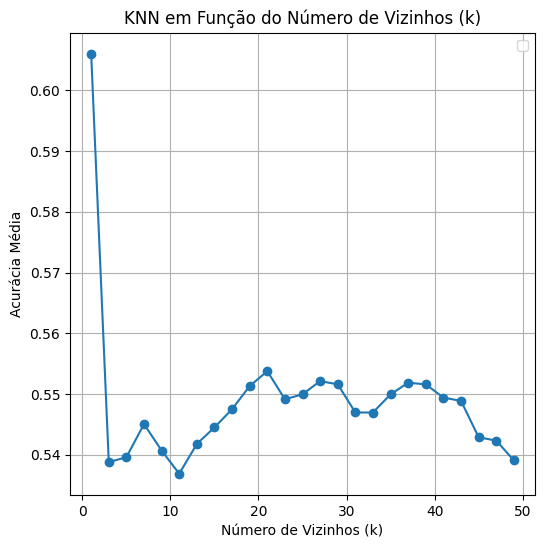

In [6]:
# Obtendo os resultados da validação cruzada
results = grid_search.cv_results_

# Verificando se os resultados estão vazios
if 'mean_test_score' not in results:
    raise ValueError("Os resultados da validação cruzada estão vazios. Verifique se a busca em grade foi realizada corretamente.")

# Obtendo as métricas correspondentes
mean_test_accuracy = results['mean_test_score']
k_values = param_grid['knn__n_neighbors']

# Criando o gráfico
plt.figure(figsize=(6, 6))

# Acurácia
plt.plot(k_values, mean_test_accuracy, marker='o')
plt.title('KNN em Função do Número de Vizinhos (k)')
plt.xlabel('Número de Vizinhos (k)')
plt.ylabel('Acurácia Média')
plt.legend()
plt.grid(True)
plt.show()